#  Predicting Gender

## Table of Contents
1. <a href="introduction">Introduction</a>
2. <a href="libraries">Libraries</a>
3. <a href="data">Knowing the Data</a>
4. <a href="explore">Exploring Some Variables</a>
5. <a href="preprocess">Preprocessing</a>
6. <a href="model">Modelling</a>
7. <a href="validate">Validation</a>

### 1. Introduction

A quick coding session for practice. We will attempt to predict the gender of passengers using the Titanic dataset from Kaggle's Titanic competition.

### 2. Libraries




In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Print plots
%matplotlib inline

import warnings; warnings.simplefilter('ignore') # Don't print warnings

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Read Data
train_data_path = "./input/train.csv"
raw_train_data = pd.read_csv(train_data_path)

df_train = raw_train_data.copy()

# Data Summary
print("Info: \n")
df_train.info()
print("\nDescription:\n{}".format(raw_train_data.describe()))
df_train.describe()
print("\nHead:\n")
df_train.head()

Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB

Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Knowing the Data

### 3.1 Which columns have missing data?

In [3]:
# See which columns have missing values
for column in df_train:
    num_nulls = df_train[column].isnull().sum()
    
    if num_nulls > 0:
        print(column + ' # data missing: {}'.format(num_nulls))

Age # data missing: 177
Cabin # data missing: 687
Embarked # data missing: 2


### 3.2 Imputation

In [ ]:
# Drop Cabin (too many missing values)
df_train.drop('Cabin', axis=1, inplace=True)

In [12]:
# Impute missing valuse in Embarked with mode
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)

# Check
print("Embarked # data missing: {}".format(df_train['Embarked'].isnull().sum()))

Embarked # data missing: 0


In [4]:
# Impute missing values in Age with median
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass']).Age.transform('median')

# Check
print("Age # data missing: {}".format(df_train['Age'].isnull().sum()))

Age # data missing: 0


### 3.3 Visualization

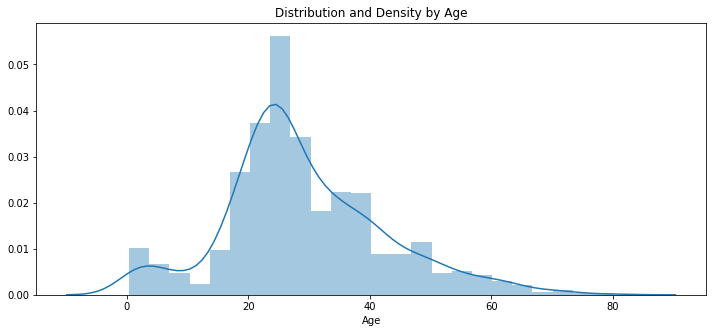

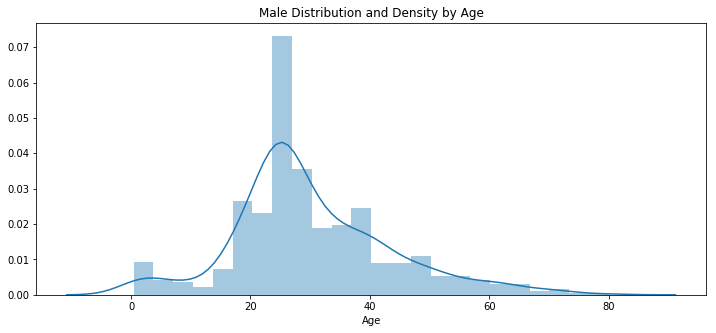

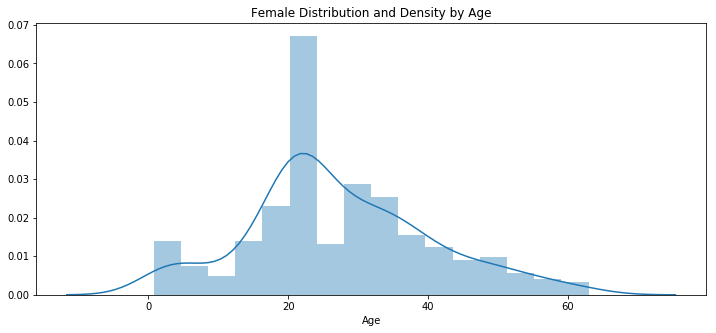

In [5]:
# Graph Age Distribution by Gender

# Using Seaborn
plt.figure(figsize=(12, 5))
sns.distplot(df_train['Age'], bins=24)
plt.title("Distribution and Density by Age")
plt.xlabel('Age')
plt.show()

# Males
plt.figure(figsize=(12, 5))
sns.distplot(df_train.loc[df_train.Sex == 'male', ['Age']])
plt.title("Male Distribution and Density by Age")
plt.xlabel('Age')
plt.show()

# Females
plt.figure(figsize=(12, 5))
sns.distplot(df_train.loc[df_train['Sex'] == 'female']['Age'])
plt.title("Female Distribution and Density by Age")
plt.xlabel('Age')
plt.show()

In [ ]:
# Graph Embarked Distribution by Gender

# Using Seaborn
plt.figure(figsize=(12, 5))
sns.distplot(df_train['Embarked'], bins=24)
plt.title("Distribution and Density by Embarked")
plt.xlabel('Embarked')
plt.show()

# S
plt.figure(figsize=(12, 5))
sns.distplot(df_train.loc[df_train.Embarked == 'S', ['Embarked']])
plt.title("Male Distribution and Density by Age")
plt.xlabel('Age')
plt.show()

# Q
plt.figure(figsize=(12, 5))
sns.distplot(df_train.loc[df_train['Sex'] == 'female']['Age'])
plt.title("Female Distribution and Density by Age")
plt.xlabel('Age')
plt.show()

# C

In [ ]:
# Gender v Survival
df1 = raw_train_data.copy()
df1.drop('Sex', axis=1, inplace=True)
gend_df = pd.get_dummies(raw_train_data['Sex'])
df1['female'] = gend_df['female']
df1['male'] = gend_df['male']

# print(df1.head())
df1.drop(['Age', 'Fare'], axis=1, inplace=True)
df1.groupby('Survived').count().plot.bar()

df2 = df1.groupby('Survived').count()
df2[['Parch', 'male', 'female']].plot.bar()

df2.head()

df3 = raw_train_data.copy()

df3.info()

# print(df1.groupby()['male', 'female'].head())
# df1.groupby('Survived')['male'].plot.hist(stacked=False)

# print(raw_train_data.groupby('Sex')["Survived"].mean())